Let's start off by importing a few functions from `Reg_class` to initalize the Franke function

In [1]:
from Reg_class import FrankeFunction, plotter
import numpy as np, matplotlib.pyplot as plt
n = 40
x = np.sort(np.random.rand(n))
y = np.sort(np.random.rand(n))
x, y = np.meshgrid(x, y)

noise = 0.1*np.random.randn(n, n)
z = FrankeFunction(x, y) + noise
plotter(x, y, z)

x, y, z = x.ravel(), y.ravel(), z.ravel()

<Figure size 640x480 with 2 Axes>

Now that we have our data, we can perform a standard linear regression to fit a surface by a polynomial of order $p_x = p_y = 5$. 

In [2]:
from Reg_class import Polyfit, DesignMatrix
px, py = 5, 5
X = DesignMatrix(x, y, px, py)
reg = Polyfit()

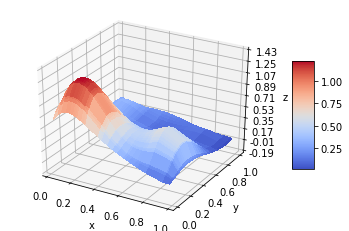

In [3]:
OLS_beta, OLS_fit = reg.fit(X, z, model='OLS')
plotter(x.reshape(n, n), y.reshape(n, n), OLS_fit.reshape(n, n))

## exercise a)

In [4]:
print (reg.R2(), reg.MSE())

0.9103777697002088 0.01057525393187165


Confidence intervals dont work yet.. size of interval is up to 36 times the size of the coefficient.

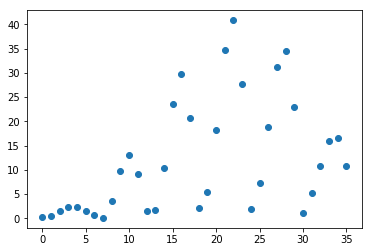

In [5]:
b_var = reg.beta_variance()
conf_int = 2*1.96*np.sqrt(b_var)
c_int_frac = np.abs(OLS_beta)/conf_int
plt.scatter(np.arange(36), c_int_frac)


## exercise b)

In [6]:
from Reg_class import train_test_split, kfold_split
X_train, z_train, X_test, z_test= train_test_split(X, z)
print (z_train.shape, X_train.shape, z_test.shape, X_test.shape)

(1200,) (1200, 36) (400,) (400, 36)


In [12]:
k = 5
X_kfold, z_kfold = kfold_split(X_train, z_train, k)
print (X_kfold[0].shape , len(z_kfold))

(240, 36) 5


In [23]:
def kfold_xval():
    for i in range(k):
        X_xtrain, z_xtrain = np.delete(X_kfold, i, 0), np.delete(z_kfold, i, 0)
        X_xtest, z_xtest = X_kfold[i], z_kfold[i]
        print (X_xtrain.shape)
kfold_xval()
        
        
    

(240, 36)
(240, 36)
(240, 36)
(240, 36)
(240, 36)


In [17]:
a = np.ones(3)
A = [a, 2*a, 3*a]
for i in range(3):
    print (np.delete(A, i, 0))

[[2. 2. 2.]
 [3. 3. 3.]]
[[1. 1. 1.]
 [3. 3. 3.]]
[[1. 1. 1.]
 [2. 2. 2.]]
